# Libraries

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# SIFT

In [15]:
def sift_matching(img1_path, img2_path):
    sift = cv2.SIFT_create()

    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    good = []
    for m, n in matches:
        if m.distance < 0.55 * n.distance:
            good.append([m])

    img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return img3


# ORB

In [16]:
def orb_matching(img1_path, img2_path):
    orb = cv2.ORB_create()

    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return img3

# SIFT VS ORB

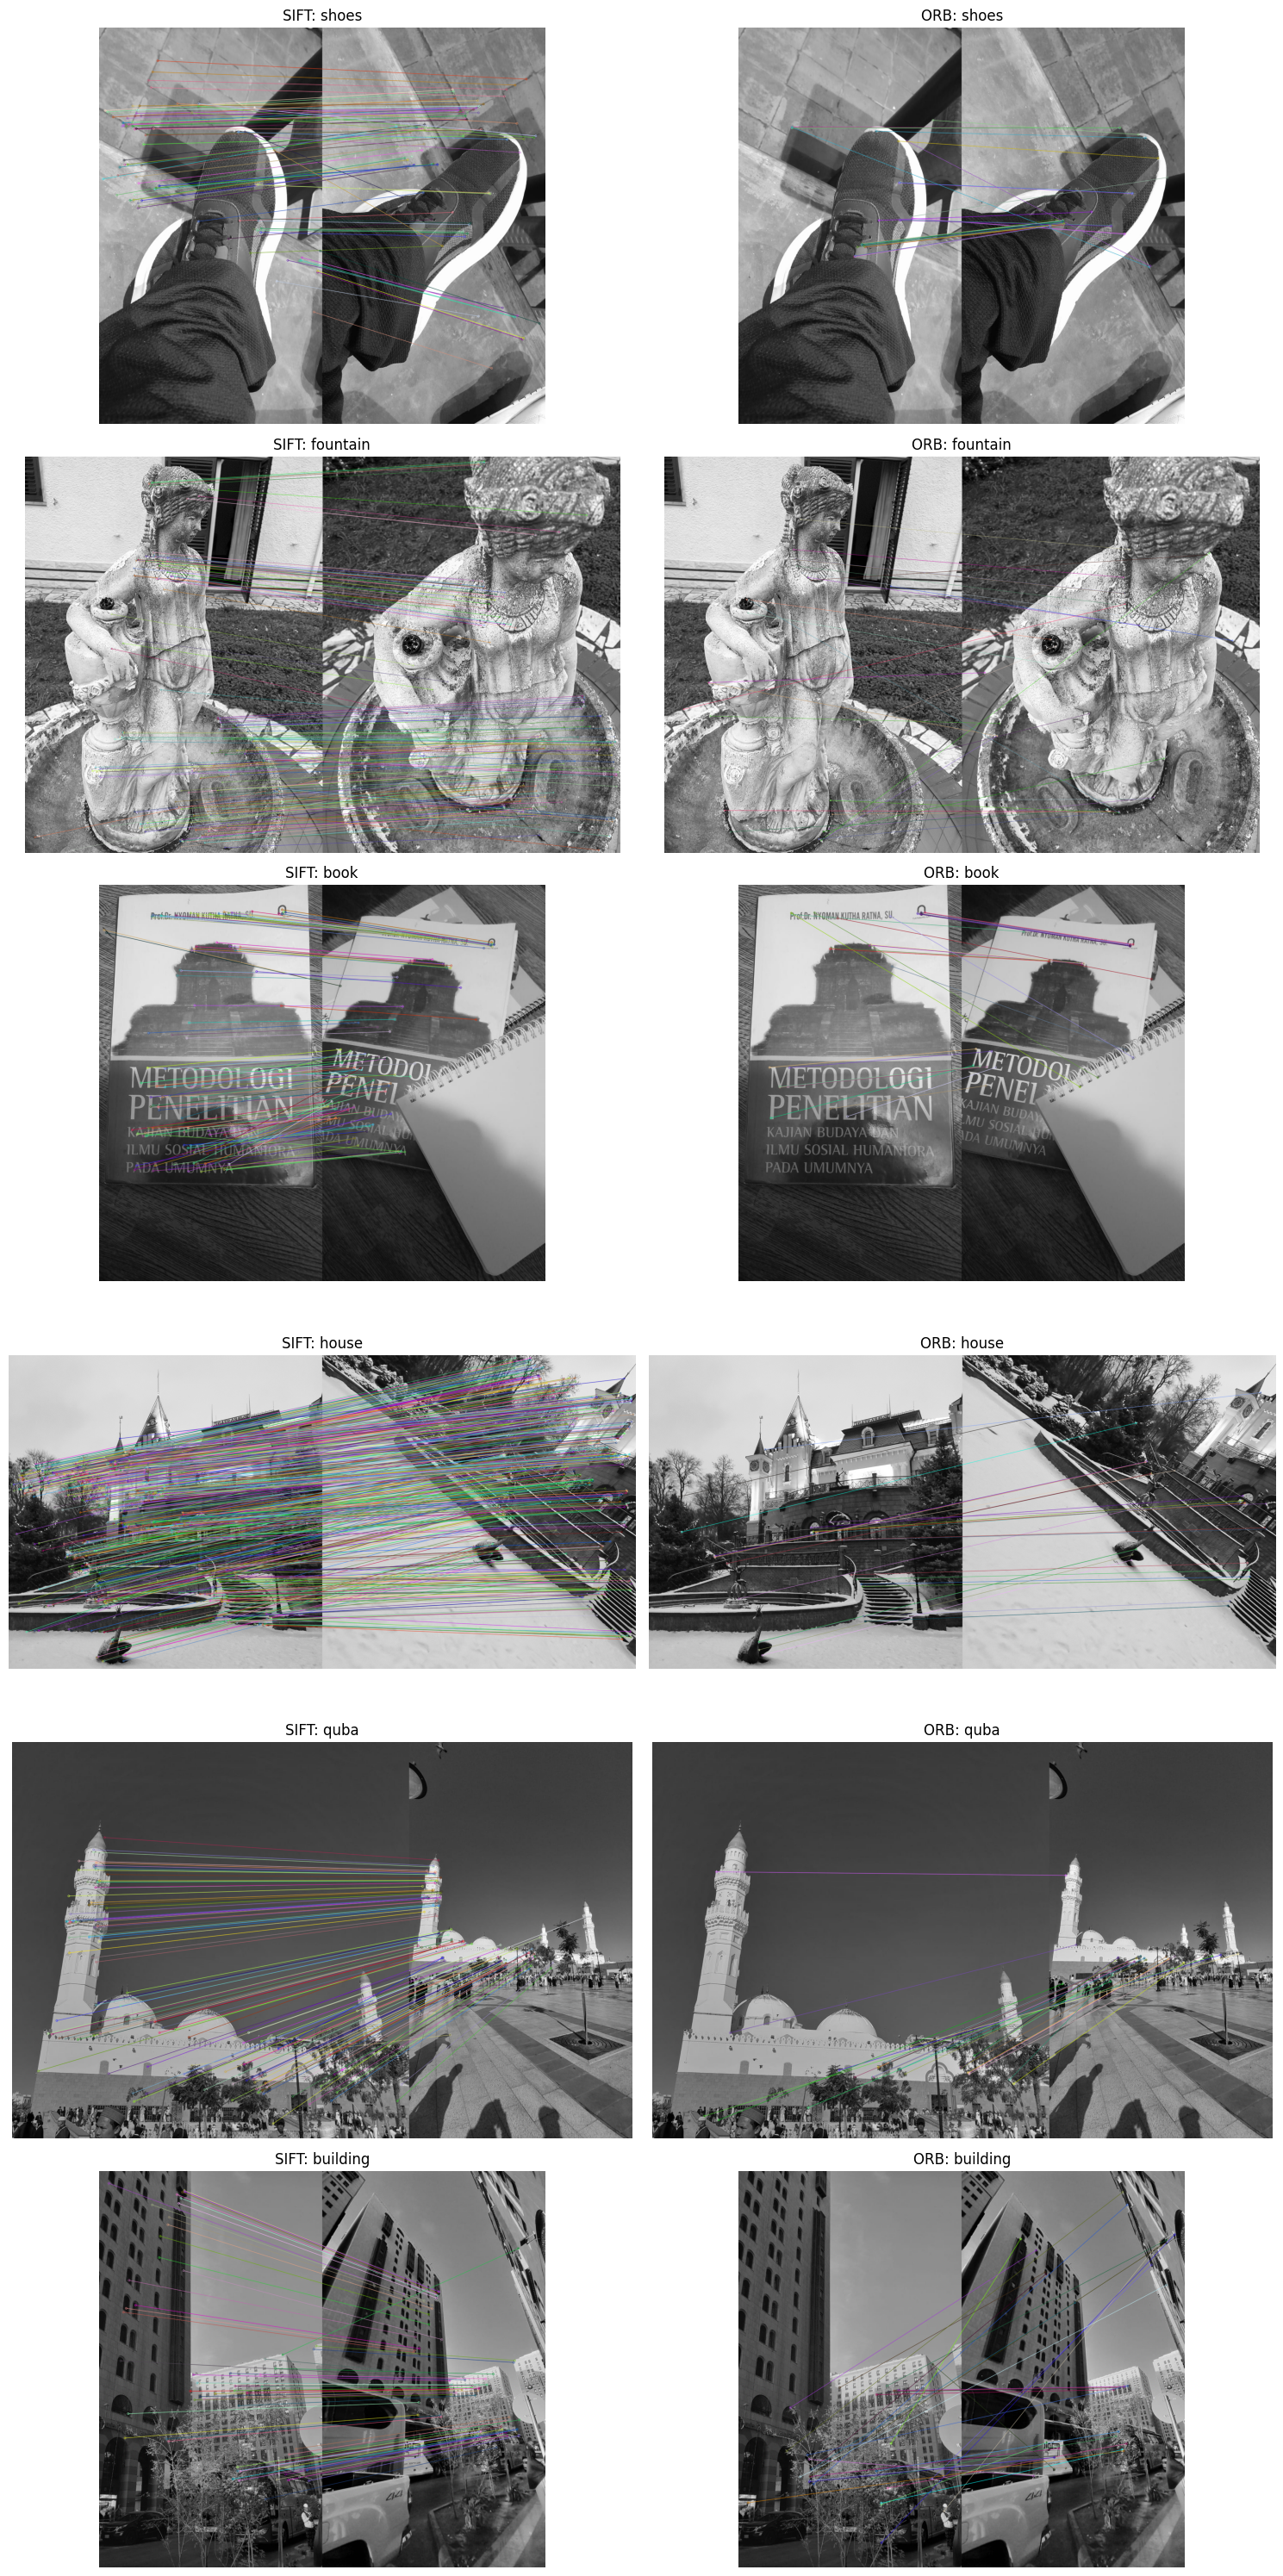

In [19]:
images = [
    'shoes(1).jpg', 'shoes(2).jpg',
    'fountain(1).jpeg', 'fountain(2).jpeg',
    'book(1).jpg', 'book(2).jpg',
    'house(1).jpg', 'house(2).jpg',
    'quba(1).jpg', 'quba(2).jpg',
    'building(1).jpg', 'building(2).jpg'

]

fig, axes = plt.subplots(6, 2, figsize=(15, 30))

for i in range(0, len(images), 2):
    img1_path = f'pairs/{images[i]}'
    img2_path = f'pairs/{images[i + 1]}'

    img_name = images[i].split('(')[0]

    sift_result = sift_matching(img1_path, img2_path)
    axes[i // 2, 0].imshow(sift_result)
    axes[i // 2, 0].set_title(f'SIFT: {img_name}')
    axes[i // 2, 0].axis('off')

    orb_result = orb_matching(img1_path, img2_path)
    axes[i // 2, 1].imshow(orb_result)
    axes[i // 2, 1].set_title(f'ORB: {img_name}')
    axes[i // 2, 1].axis('off')

plt.tight_layout()
plt.show()


# FLANN

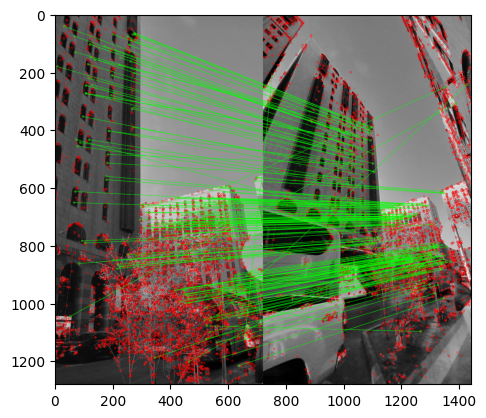

(<matplotlib.image.AxesImage at 0x2562588ad08>, None)

In [18]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6,
                   key_size = 12,
                   multi_probe_level = 1)


img1 = cv2.imread('pairs/building(1).jpg',cv2.IMREAD_GRAYSCALE) 
img2 = cv2.imread('pairs/building(2).jpg',cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

matchesMask = [[0,0] for i in range(len(matches))]

for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()